<a href="https://colab.research.google.com/github/BritneyMuller/colab-notebooks/blob/master/MIA_Keyword_Cluster_wink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Unidecode

In [ ]:
# Data Structures
import numpy  as np
import pandas as pd
import json

# Corpus Processing
import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

# Map Viz
import folium
#import branca.colormap as cm
from branca.element import Figure

In [ ]:
data = pd.read_excel('test.xlsx')
data.columns = map(str.lower, data.columns)

In [ ]:
indicators = ['red', 'yellow', 'blue',"orange","green","violet"]

def indication_find(x):
    list_of_words = x.split(' ')
    out_data = [] # initialize an empty list
    for word in list_of_words :
        # remove punctuations with strip() 
         if word.strip('.,!?') in indicators:
            out_data.append(word)
    if len(out_data) == 0:
      return np.NAN
    else:
      return out_data[0]
    return str(out_data)

data["colours"] = data["keywords"].apply(indication_find)

In [ ]:
data.tail()

,keywords,volume,colours
1443,whole beans vs ground coffee cold brew,20.0,NaN
1444,whole in the ground coffee,320.0,NaN
1445,wholesale ground coffee,50.0,NaN
1446,wholesale ground coffee bulk,20.0,NaN
1447,wholesale ground coffee suppliers,10.0,NaN


In [ ]:
corpus = data['keywords'].tolist()
corpus[18][0:447]

'benefits of ground coffee'

In [ ]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [ ]:
# def processCorpus(corpus, language):   
#     stopwords = nltk.corpus.stopwords.words(language)
#     param_stemmer = SnowballStemmer(language)
#     countries_list = [line.rstrip('\n') for line in open('lists/countries.txt')] # Load .txt file line by line
#     nationalities_list = [line.rstrip('\n') for line in open('lists/nationalities.txt')] # Load .txt file line by line
#     other_words = [line.rstrip('\n') for line in open('lists/stopwords_scrapmaker.txt')] # Load .txt file line by line
    
#     for document in corpus:
#         index = corpus.index(document)
#         corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
#         corpus[index] = corpus[index].replace(',', '')          # Removes commas
#         corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
#         corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
#         corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
#         corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
#         corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
#         corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
#         corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

#         listOfTokens = word_tokenize(corpus[index])
#         twoLetterWord = twoLetters(listOfTokens)

#         listOfTokens = removeWords(listOfTokens, stopwords)
#         listOfTokens = removeWords(listOfTokens, twoLetterWord)
#         listOfTokens = removeWords(listOfTokens, countries_list)
#         listOfTokens = removeWords(listOfTokens, nationalities_list)
#         listOfTokens = removeWords(listOfTokens, other_words)
        
#         listOfTokens = applyStemming(listOfTokens, param_stemmer)
#         listOfTokens = removeWords(listOfTokens, other_words)

#         corpus[index]   = " ".join(listOfTokens)
#         corpus[index] = unidecode(corpus[index])

#     return corpus

In [ ]:
# import nltk
# nltk.download('stopwords')
# language = 'english'
# corpus = processCorpus(corpus, language)
# corpus[18][0:460]

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

1448 rows


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447
aeropress,0.691590,0.692989,0.784642,0.534062,0.562522,0.619392,0.472017,0.632302,0.544360,0.702062,0.634119,0.456299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
vs,0.561992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.570501,0.515290,0.370792,0.000000,0.000000,0.000000,0.377971,0.374441,0.724520,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.475971,0.371038,0.0,0.391265,0.000000,0.000000,0.000000,0.000000
pot,0.297342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271852,0.234042,0.301844,0.272633,0.000000,0.311543,0.228898,0.190483,0.199979,0.198112,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.196036,0.000000,0.000000,0.000000,0.000000,0.332276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.386780,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285594,0.000000,0.000000,0.000000,0.000000,0.293258,0.236677,0.261086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
moka,0.296390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270981,0.233293,0.300878,0.271760,0.000000,0.310546,0.228165,0.189873,0.199339,0.197478,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.195408,0.000000,0.000000,0.000000,0.000000,0.331212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385542,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.284679,0.000000,0.000000,0.000000,0.000000,0.292320,0.235920,0.260250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
coffee,0.172072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.221836,0.154966,0.104414,0.141636,0.15959,0.0,0.13474,0.000000,0.134209,0.162649,0.179558,0.315259,0.192288,0.138049,0.182746,0.154571,0.162398,0.141665,0.144409,0.133412,0.293023,0.162805,0.223830,...,0.140274,0.158551,0.11225,0.130257,0.099175,0.111691,0.12781,0.143858,0.108063,0.111889,0.156894,0.150301,0.109205,0.141418,0.173487,0.148847,0.000000,0.139272,0.146571,0.157357,0.185238,0.169709,0.136965,0.000000,0.205731,0.153916,0.133249,0.159745,0.200351,0.108135,0.140024,0.135191,0.145734,0.113605,0.0,0.119799,0.154989,0.180837,0.135799,0.128061


In [ ]:
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447
aeropress,0.691590,0.692989,0.784642,0.534062,0.562522,0.619392,0.472017,0.632302,0.544360,0.702062,0.634119,0.456299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
vs,0.561992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.570501,0.515290,0.370792,0.000000,0.000000,0.000000,0.377971,0.374441,0.724520,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.475971,0.371038,0.0,0.391265,0.000000,0.000000,0.000000,0.000000
pot,0.297342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271852,0.234042,0.301844,0.272633,0.000000,0.311543,0.228898,0.190483,0.199979,0.198112,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.196036,0.000000,0.000000,0.000000,0.000000,0.332276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.386780,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285594,0.000000,0.000000,0.000000,0.000000,0.293258,0.236677,0.261086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
moka,0.296390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270981,0.233293,0.300878,0.271760,0.000000,0.310546,0.228165,0.189873,0.199339,0.197478,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.195408,0.000000,0.000000,0.000000,0.000000,0.331212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385542,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.284679,0.000000,0.000000,0.000000,0.000000,0.292320,0.235920,0.260250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
coffee,0.172072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.221836,0.154966,0.104414,0.141636,0.15959,0.0,0.13474,0.000000,0.134209,0.162649,0.179558,0.315259,0.192288,0.138049,0.182746,0.154571,0.162398,0.141665,0.144409,0.133412,0.293023,0.162805,0.223830,...,0.140274,0.158551,0.11225,0.130257,0.099175,0.111691,0.12781,0.143858,0.108063,0.111889,0.156894,0.150301,0.109205,0.141418,0.173487,0.148847,0.000000,0.139272,0.146571,0.157357,0.185238,0.169709,0.136965,0.000000,0.205731,0.153916,0.133249,0.159745,0.200351,0.108135,0.140024,0.135191,0.145734,0.113605,0.0,0.119799,0.154989,0.180837,0.135799,0.128061


## K-Means

##### Function that runs the K-Means algorithm *max_k* times and returns a dictionary of each k result

In [ ]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

#### Silhouette Score

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [ ]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [ ]:
# Running Kmeans
k = 10
kmeans_results = run_KMeans(k, final_df)

# Plotting Silhouette Analysis


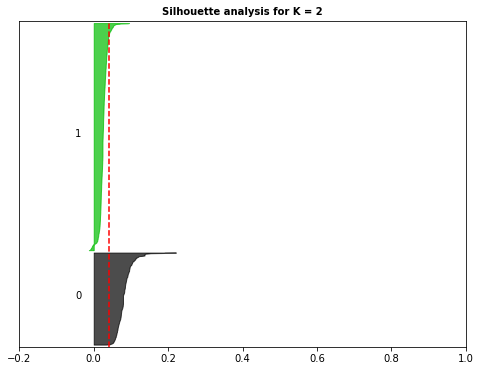

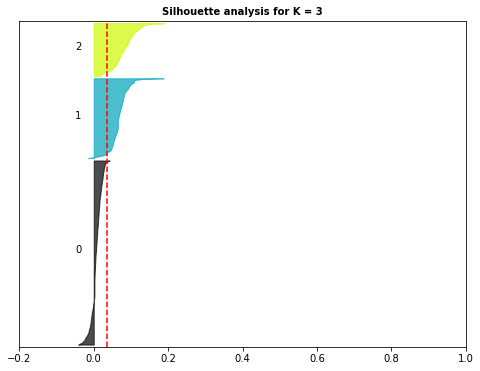

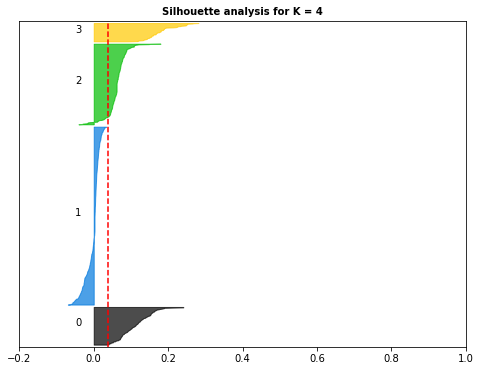

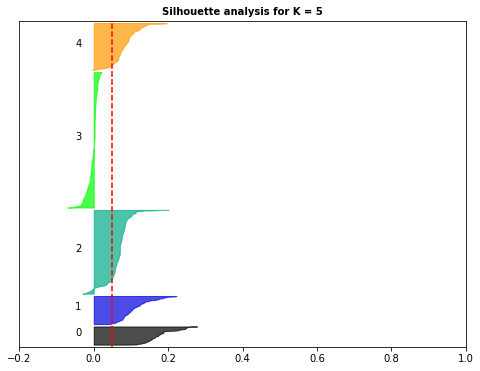

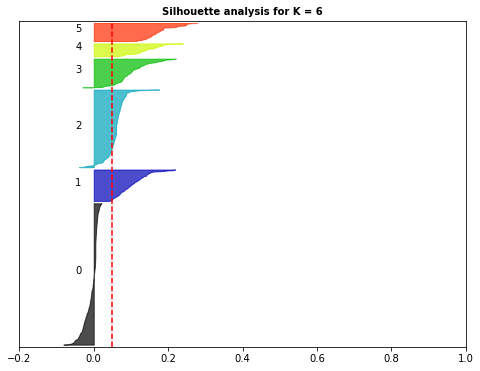

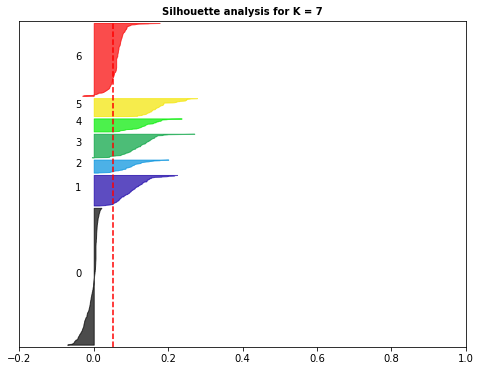

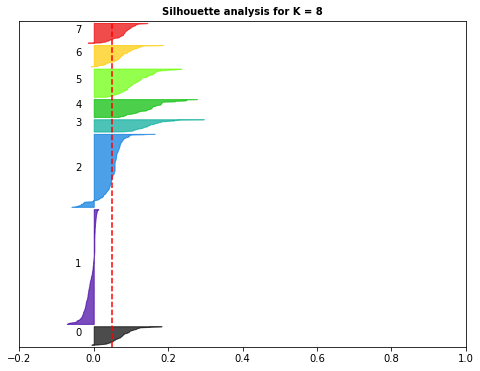

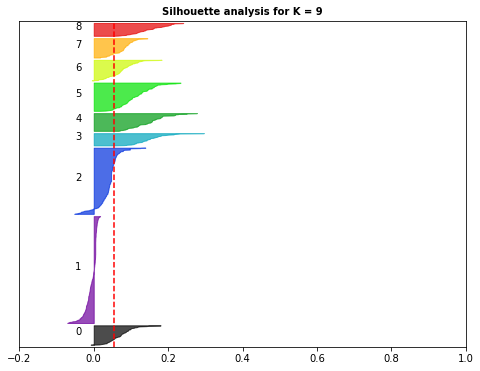

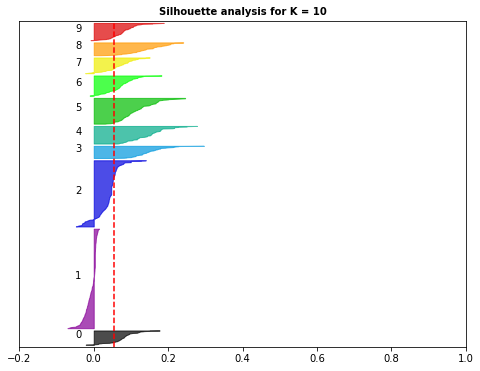

In [ ]:
silhouette(kmeans_results, final_df, plot=True)

## Cluster Analysis

Now we can choose the best number of K and take a deeper look at each cluster. Looking at the plots above, we have some clues that when K = 5 is when the clusters are best defined. So first we will use a simple histogram to look at the most dominant words in each cluster:

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

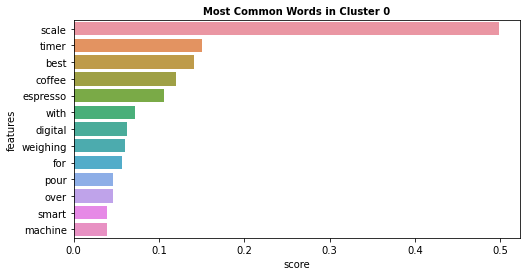

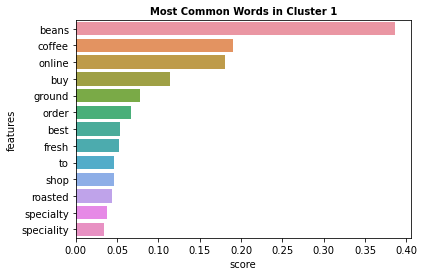

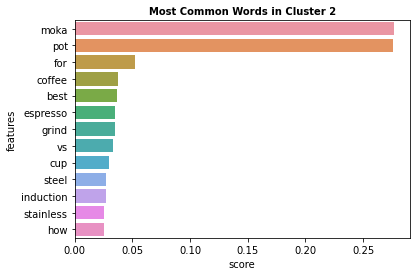

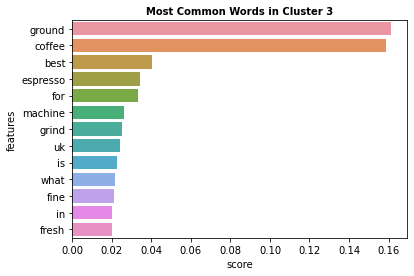

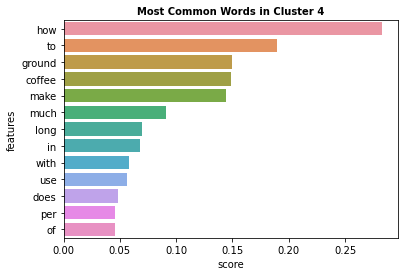

In [ ]:
best_result = 5
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

#### Map of Words

Now that we can look at the graphs above and see the best scored words in each cluster, it's also interesting to make it prettier by making a map of words of each cluster!

In [ ]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

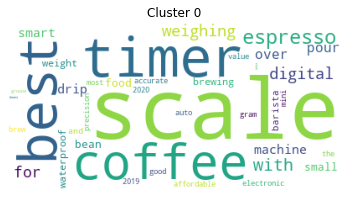

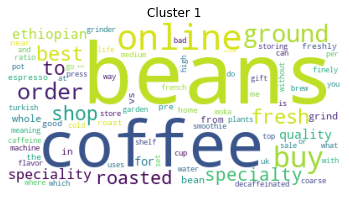

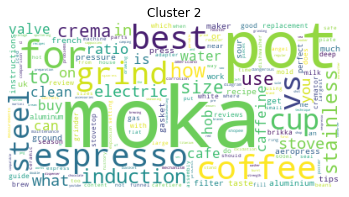

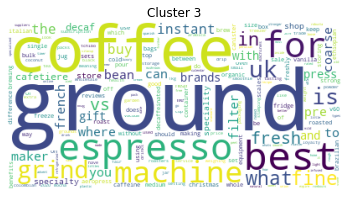

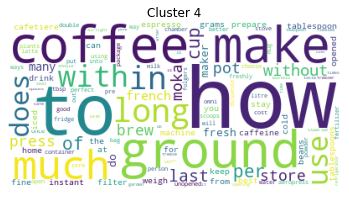

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [ ]:
# Assigning the cluster labels to each country
labels = kmeans.labels_ 
data['label'] = labels
data.head()

,keywords,volume,colours,label
0,aeropress coffee vs moka pot,10.0,NaN,2
1,aeropress espresso grind,10.0,NaN,3
2,aeropress grind,390.0,NaN,3
3,aeropress grind level,10.0,NaN,3
4,aeropress grind setting,20.0,NaN,3


In [ ]:
data.tail()

,keywords,volume,colours,label
1443,whole beans vs ground coffee cold brew,20.0,NaN,1
1444,whole in the ground coffee,320.0,NaN,3
1445,wholesale ground coffee,50.0,NaN,3
1446,wholesale ground coffee bulk,20.0,NaN,3
1447,wholesale ground coffee suppliers,10.0,NaN,3
